In [53]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.tree import DecisionTreeRegressor

In [54]:
df = pd.read_csv(r'C:\Users\om\OneDrive\Desktop\intern Task\Datasets\Stock Prices Data Set.csv')

df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [55]:
df['date'] = pd.to_datetime(df['date'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497464 non-null  float64       
 4   low     497464 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [57]:
# We have some null values
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [58]:
# Replaced the Null values with their respective feature's mean
# Also created the new columns
df['open'] = df['open'].fillna(df['open'].mean())
df['high'] = df['high'].fillna(df['high'].mean())
df['low'] = df['low'].fillna(df['low'].mean())

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497472 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [60]:
# Splitted the Date col into Year, Month, Day and Day_of_Week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [61]:
# Dropped the col Date
df = df.drop('date',axis=1)

In [62]:
# So far the  dataset
df.head()

,symbol,open,high,low,close,volume,year,month,day,day_of_week
0,AAL,25.0700,25.8200,25.0600,25.3600,8998943,2014,1,2,3
1,AAPL,79.3828,79.5756,78.8601,79.0185,58791957,2014,1,2,3
2,AAP,110.3600,111.8800,109.2900,109.7400,542711,2014,1,2,3
3,ABBV,52.1200,52.3300,51.5200,51.9800,4569061,2014,1,2,3
4,ABC,70.1100,70.2300,69.4800,69.8900,1148391,2014,1,2,3


In [63]:
# Splitted the cols as numerical and categorical
features_num = ['volume','open','high','low']
cat_feature = ['symbol']

In [64]:
# Processed the data using ColumnTransformer 
from sklearn.preprocessing import OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pre',FunctionTransformer(mp.log1p),features_num),
        ('cat_pre',OrdinalEncoder(),cat_feature)
    ],
    remainder='passthrough'
)

In [65]:
# Created the pipeline to process and fit the data into the model
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('preprocess',preprocessor),
    ('DTree',DecisionTreeRegressor(max_depth=5,
                                   min_samples_split=20,
                                   min_samples_leaf=10,
                                   criterion='poisson',
                                   random_state=42))
])

In [66]:
# Splitting of input and output data
X = df.drop('close',axis=1)
Y = df['close']

In [67]:
# Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [68]:
# Fitting the train dataset into the pipeline
pipe.fit(X_train,Y_train)

,steps,"[('preprocess', ...), ('DTree', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pre', ...), ('cat_pre', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
# Predicting the output on unseen data (Test dataset)
y_pred = pipe.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(Y_test,y_pred))
print("RMSE",mp.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 Score: ',r2_score(Y_test,y_pred))

MAE: 2.8831024953746853
RMSE 5.938055480008536
R2 Score:  0.9965689247856522


In [71]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual Close': Y_test, 'Predicted Close': y_pred})

# Display the first few rows of the comparison
print("Comparison of Actual vs. Predicted Close Prices on Unseen Data:")
display(comparison_df.sample(5))

Comparison of Actual vs. Predicted Close Prices on Unseen Data:


,Actual Close,Predicted Close
61584,57.34,56.702724
423176,27.72,25.344134
428461,69.04,71.008112
474003,109.36,106.271023
13775,12.91,10.653583


In [72]:
# Extract the preprocessor and the DecisionTreeRegressor parameters from the existing pipeline
preprocessor_obj = pipe.named_steps["preprocess"]
dt_params = pipe.named_steps['DTree'].get_params()

# Transform the training data using the preprocessor
X_train_transformed = preprocessor_obj.transform(X_train)


In [73]:
from sklearn.tree import DecisionTreeRegressor

# Create an unfitted DecisionTreeRegressor with the same parameters as the original model
# This is used to compute the cost-complexity pruning path.
pruning_dt = DecisionTreeRegressor(
    random_state=dt_params['random_state'],
    max_depth=dt_params['max_depth'],
    min_samples_split=dt_params['min_samples_split'],
    min_samples_leaf=dt_params['min_samples_leaf'],
    criterion=dt_params['criterion']
)

# Fit this temporary tree to the transformed training data to get the pruning path
pruning_dt.fit(X_train_transformed, Y_train)

# Compute the cost-complexity pruning path
path = pruning_dt.cost_complexity_pruning_path(X_train_transformed, Y_train)
ccp_alphas = path.ccp_alphas

In [74]:
from sklearn.model_selection import cross_val_score

alpha_scores = []

# Perform cross-validation for each ccp_alpha value
for alpha in ccp_alphas:
    temp_dt = DecisionTreeRegressor(
        random_state=dt_params['random_state'],
        max_depth=dt_params['max_depth'],
        min_samples_split=dt_params['min_samples_split'],
        min_samples_leaf=dt_params['min_samples_leaf'],
        criterion=dt_params['criterion'],
        ccp_alpha=alpha
    )
    # Use the pre-transformed data for cross-validation on the DecisionTreeRegressor directly
    scores = cross_val_score(temp_dt, X_train_transformed, Y_train, cv=5)
    alpha_scores.append(scores.mean())

# Find the best_alpha that maximizes the cross-validation score
best_alpha = ccp_alphas[alpha_scores.index(max(alpha_scores))]
print(f"Best ccp_alpha: {best_alpha}")

Best ccp_alpha: 0.0


In [75]:
from sklearn.pipeline import Pipeline

# Re-create the pipeline with the optimized DecisionTreeRegressor using the best_alpha
optimized_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ("DTree", DecisionTreeRegressor(
        random_state=dt_params['random_state'],
        ccp_alpha=best_alpha,
        max_depth=dt_params['max_depth'],
        min_samples_split=dt_params['min_samples_split'],
        min_samples_leaf=dt_params['min_samples_leaf'],
        criterion=dt_params['criterion']
    ))
])

# Fit the optimized pipeline to the original training data (which includes the preprocessing step)
optimized_pipe.fit(X_train, Y_train)

# Make predictions using the optimized model
y_pred_optimized = optimized_pipe.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Ensure numpy is imported for mp.sqrt

print("MAE (Optimized):", mean_absolute_error(Y_test, y_pred_optimized))
print("RMSE (Optimized)", np.sqrt(mean_squared_error(Y_test, y_pred_optimized)))
print('R2 Score (Optimized): ', r2_score(Y_test, y_pred_optimized))

MAE (Optimized): 2.8831024953746853
RMSE (Optimized) 5.938055480008536
R2 Score (Optimized):  0.9965689247856522


In [77]:
# Make predictions on the X_test (unseen data for training)
y_pred_unseen = optimized_pipe.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual Close': Y_test, 'Predicted Close': y_pred_unseen})

# Display the first few rows of the comparison
print("Comparison of Actual vs. Predicted Close Prices on Unseen Data:")
display(comparison_df.sample(5))

Comparison of Actual vs. Predicted Close Prices on Unseen Data:


,Actual Close,Predicted Close
404070,66.5300,63.901331
248841,179.8598,183.766186
290127,40.0800,37.877194
231665,61.8000,63.901331
436240,31.3300,31.891090


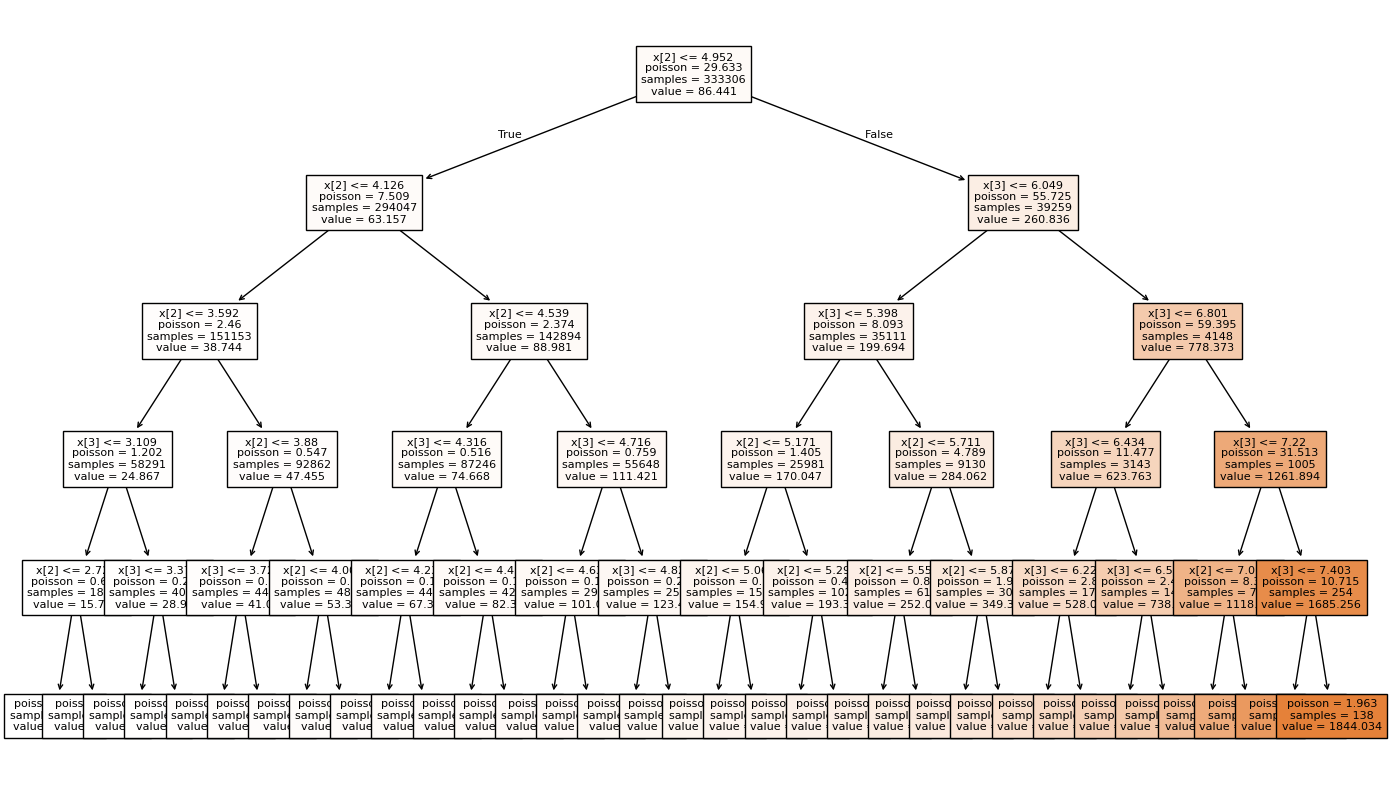

In [78]:
from sklearn.tree import plot_tree
DTree = optimized_pipe.named_steps['DTree']
plt.figure(figsize=(17,10)),
plot_tree(DTree,filled=True,fontsize=8)
plt.show()

In [79]:
import pickle
with open('Stock_price_predictor.pkl','wb') as model_file:
    pickle.dump(optimized_pipe,model_file)

In [1]:
import tensorflow

ImportError: Traceback (most recent call last):
  File "c:\Users\om\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.